In [4]:
from classification_model import vgg_unet
from predict import predict_multiple  
from predict import class_colors

inp_dir = "test"      
out_dir = "pred"  

model = vgg_unet(n_classes = 27, input_height=416, input_width=608, encoder_level=3, channels=3)
model.load_weights('checkpoints/model.weights.h5')

In [5]:
from matplotlib import pyplot as plt
import six
import cv2
import numpy as np
from functions import get_image_array
from predict import visualize_segmentation

def predict(model=None, inp=None, out_fname=None,
            checkpoints_path=None, overlay_img=False,
            class_names=None, show_legends=False, colors=class_colors,
            prediction_width=None, prediction_height=None,
            read_image_type=1):
    
    assert inp is not None, "Input must be provided."
    assert isinstance(inp, (np.ndarray, six.string_types)), \
        "Input should be a NumPy array or a file path string."

    if isinstance(inp, six.string_types):
        inp = cv2.imread(inp, read_image_type)
        assert inp is not None, f"Image at path {inp} could not be loaded."

    assert inp.ndim in [1, 3, 4], "Image should have 1, 3, or 4 dimensions."

    output_width = model.output_width
    output_height = model.output_height
    input_width = model.input_width
    input_height = model.input_height
    n_classes = model.n_classes

    x = get_image_array(inp, input_width, input_height)
    pr = model.predict(np.array([x]))
    
    pr = pr.reshape((output_height, output_width, n_classes)).argmax(axis=-1)
    
    seg_img = visualize_segmentation(
        pr, inp, n_classes=n_classes, colors=colors
    )
    
    # Display the image
    plt.imshow(seg_img)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

    # Convert the seg_img to uint8 format (if necessary)
    if seg_img.dtype != np.uint8:
        seg_img = (seg_img * 255).astype(np.uint8)  # Scale if necessary
    
    # Check if the image is in RGB and convert to BGR if needed
    if seg_img.shape[2] == 3:  # Check if there are 3 channels
        seg_img = cv2.cvtColor(seg_img, cv2.COLOR_RGB2BGR)  # Convert from RGB to BGR

    if out_fname is not None:
        # Ensure the output file name has a .png extension
        if not out_fname.endswith('.png'):
            out_fname += '.png'
        
        success = cv2.imwrite(out_fname, seg_img)
        if success:
            print(f"Saved segmented image to {out_fname}")
        else:
            print(f"Failed to save image at {out_fname}")

    return seg_img


Processing test\frame0000.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


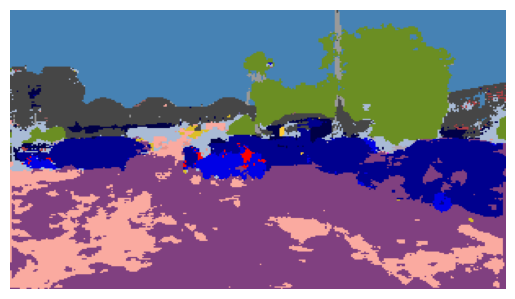

Saved segmented image to pred\frame0000.jpg
Processing test\frame0014.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


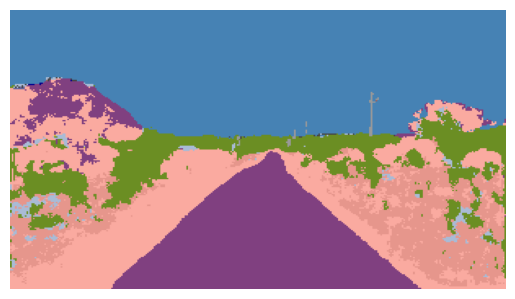

Saved segmented image to pred\frame0014.jpg
Processing test\frame0119.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


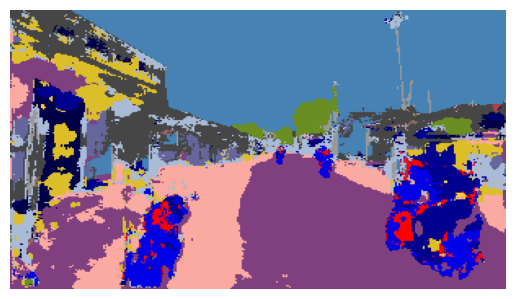

Saved segmented image to pred\frame0119.jpg
Processing test\frame0199.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


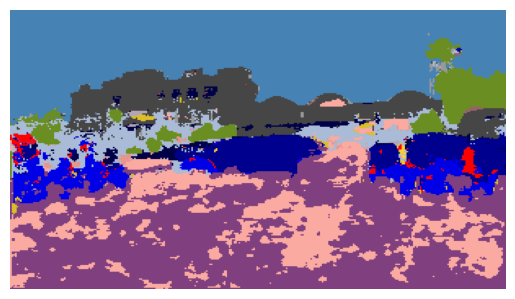

Saved segmented image to pred\frame0199.jpg
Processing test\frame0277.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


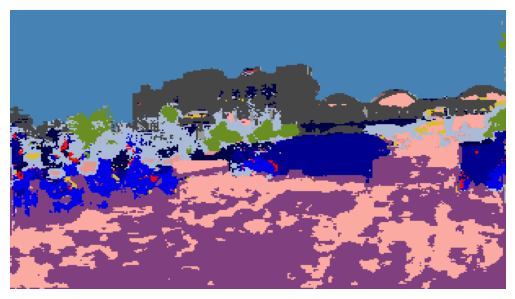

Saved segmented image to pred\frame0277.jpg
Processing test\frame0340.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


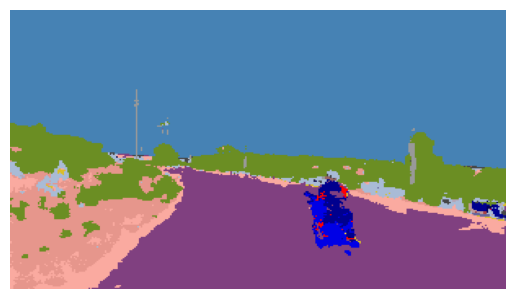

Saved segmented image to pred\frame0340.jpg
Processing test\frame0342.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


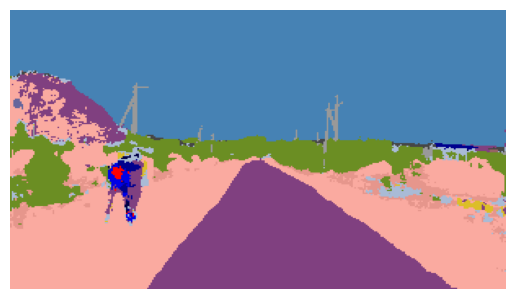

Saved segmented image to pred\frame0342.jpg
Processing test\frame0364.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


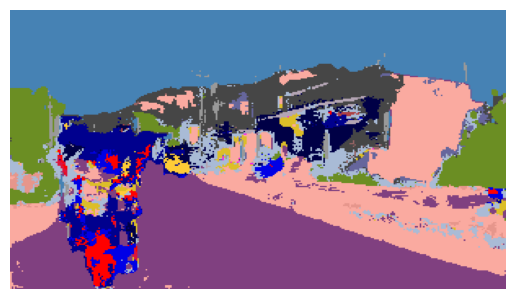

Saved segmented image to pred\frame0364.jpg
Processing test\frame0514.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


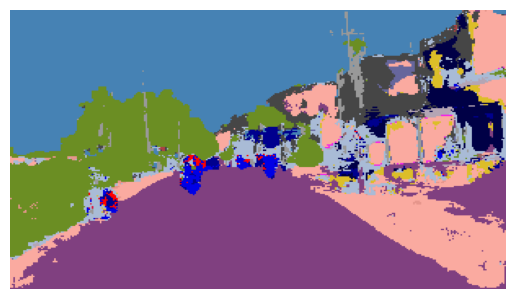

Saved segmented image to pred\frame0514.jpg
Processing test\frame0550.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


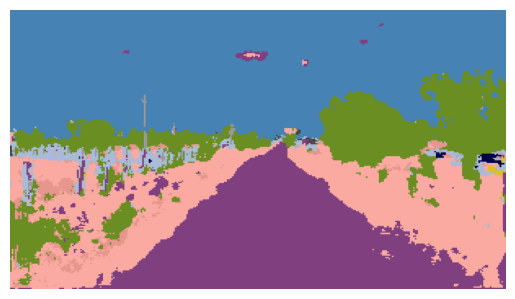

Saved segmented image to pred\frame0550.jpg
Processing test\frame0604.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


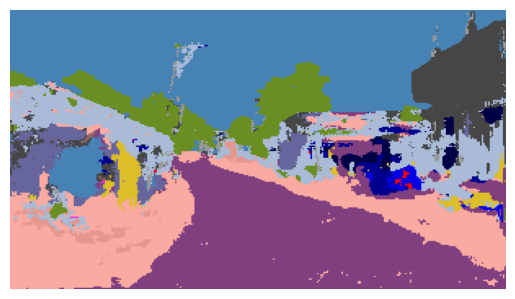

Saved segmented image to pred\frame0604.jpg
Processing test\frame0664.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


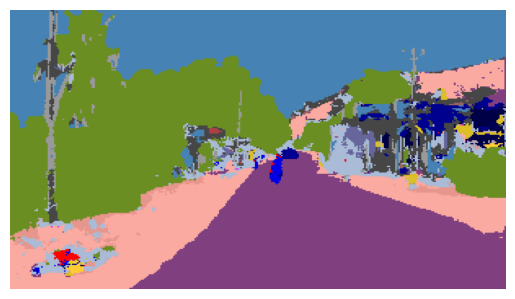

Saved segmented image to pred\frame0664.jpg
Processing test\frame0671.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


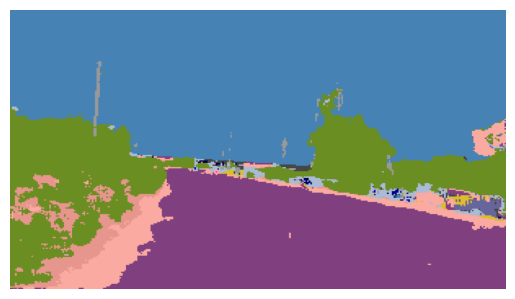

Saved segmented image to pred\frame0671.jpg
Processing test\frame0704.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


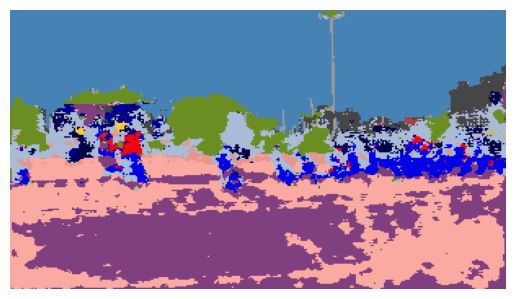

Saved segmented image to pred\frame0704.jpg
Processing test\frame0724.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


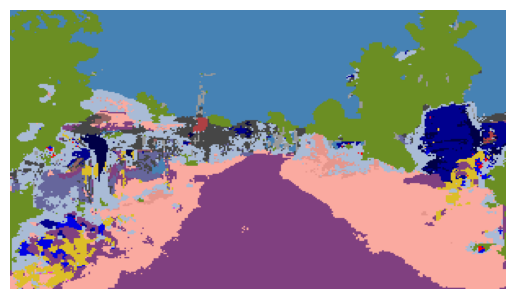

Saved segmented image to pred\frame0724.jpg
Processing test\frame0821.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


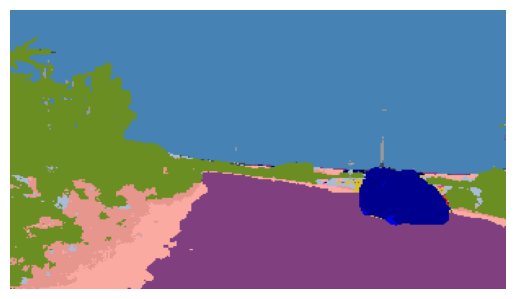

Saved segmented image to pred\frame0821.jpg
Processing test\frame0874.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


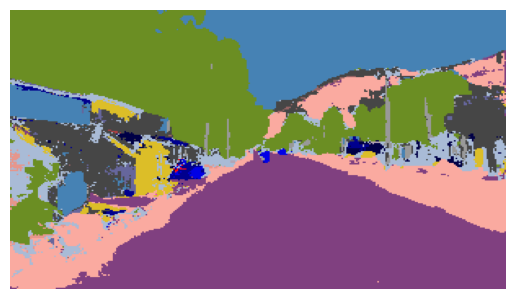

Saved segmented image to pred\frame0874.jpg
Processing test\frame0918.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


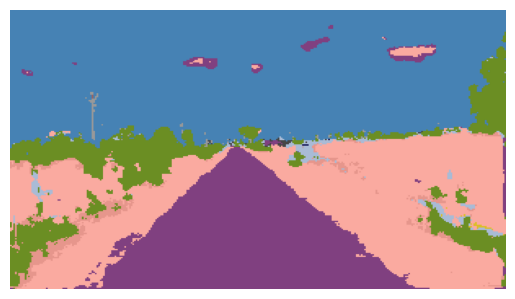

Saved segmented image to pred\frame0918.jpg
Processing test\frame0924.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


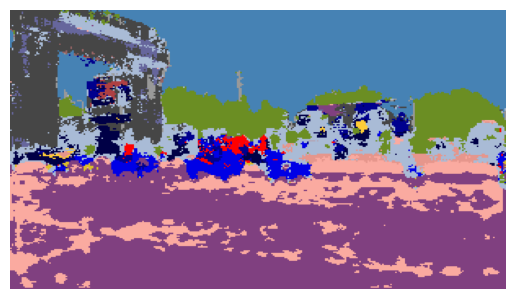

Saved segmented image to pred\frame0924.jpg
Processing test\frame0964.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


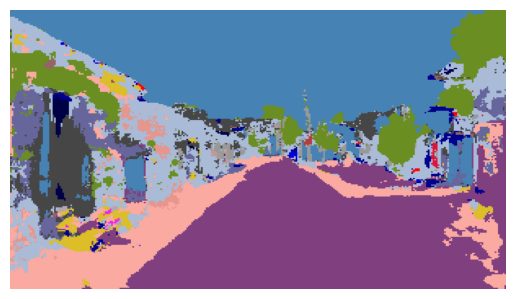

Saved segmented image to pred\frame0964.jpg
Processing test\frame0982.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


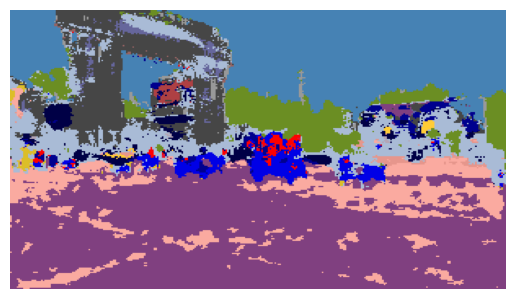

Saved segmented image to pred\frame0982.jpg
Processing test\frame1002.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


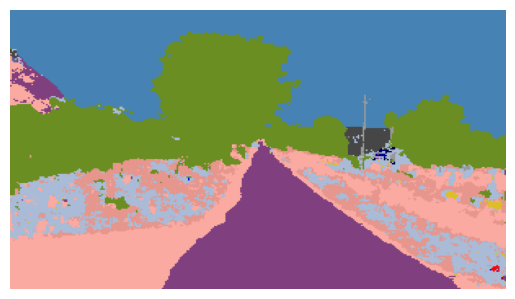

Saved segmented image to pred\frame1002.jpg
Processing test\frame1014.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


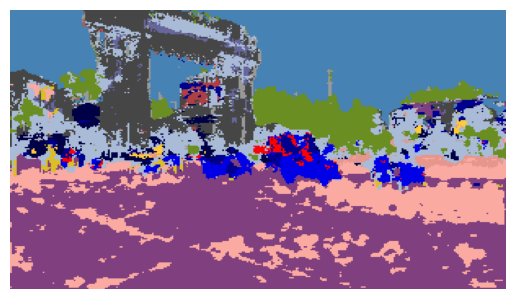

Saved segmented image to pred\frame1014.jpg
Processing test\frame10376.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


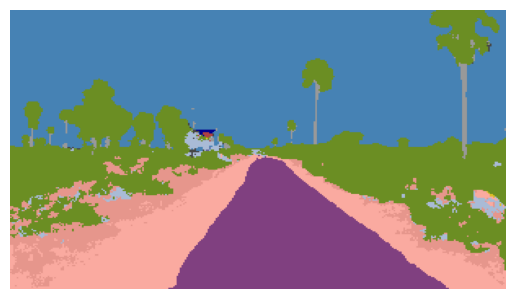

Saved segmented image to pred\frame10376.jpg
Processing test\frame1047.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


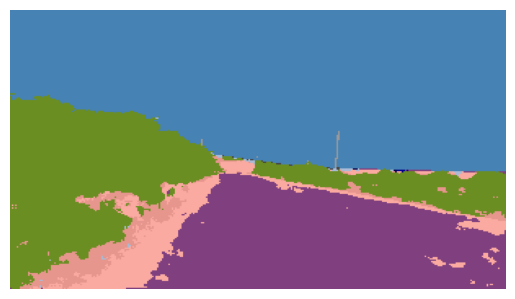

Saved segmented image to pred\frame1047.jpg
Processing test\frame10676.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


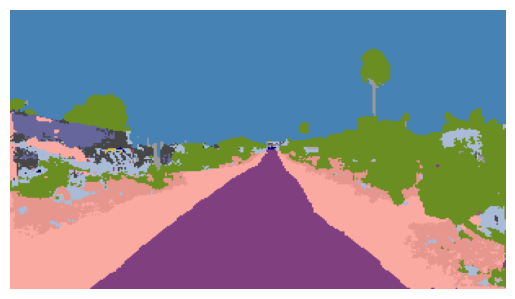

Saved segmented image to pred\frame10676.jpg
Processing test\frame10758.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


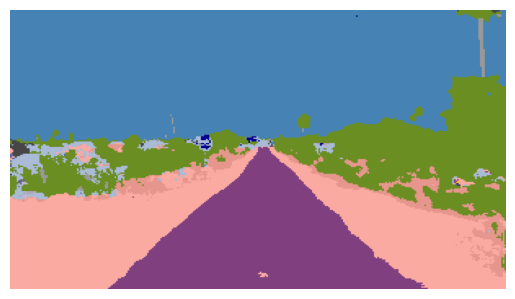

Saved segmented image to pred\frame10758.jpg
Processing test\frame1084.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


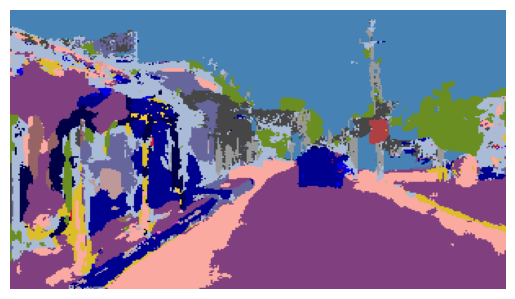

Saved segmented image to pred\frame1084.jpg
Processing test\frame11003.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


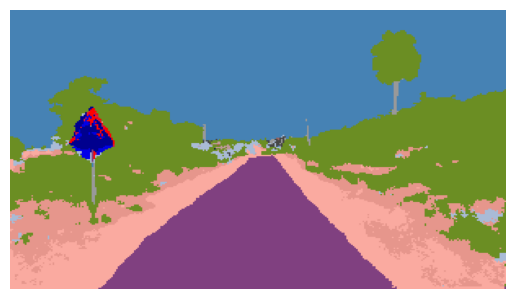

Saved segmented image to pred\frame11003.jpg
Processing test\frame11630.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


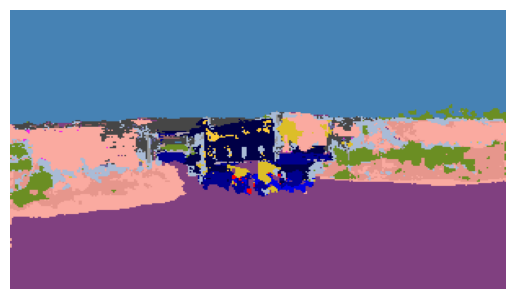

Saved segmented image to pred\frame11630.jpg
Processing test\frame1174.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


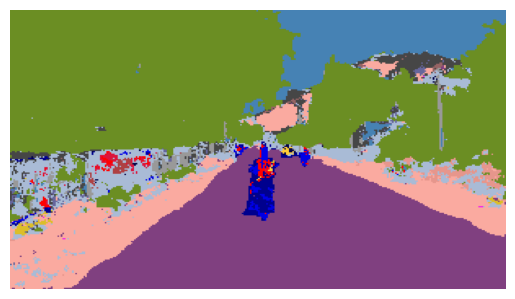

Saved segmented image to pred\frame1174.jpg
Processing test\frame12146.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


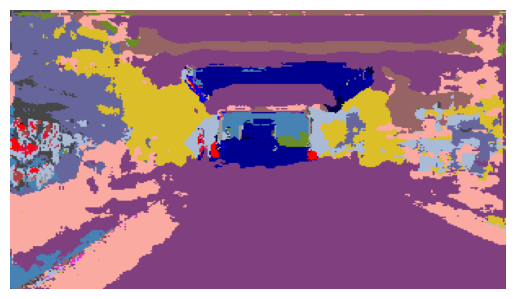

Saved segmented image to pred\frame12146.jpg
Processing test\frame1227.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


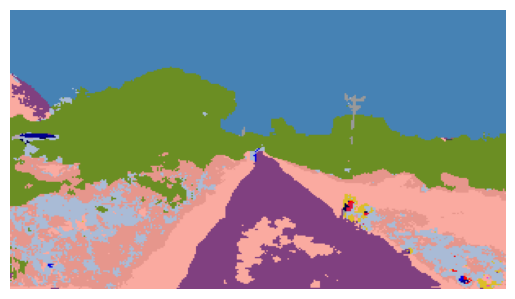

Saved segmented image to pred\frame1227.jpg
Processing test\frame1263.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


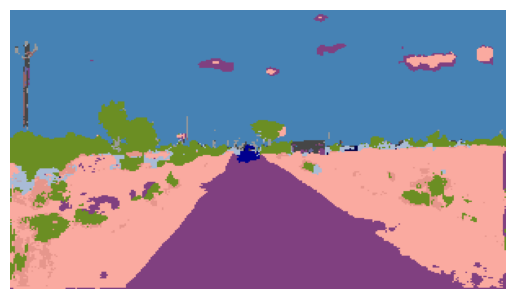

Saved segmented image to pred\frame1263.jpg
Processing test\frame1347.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


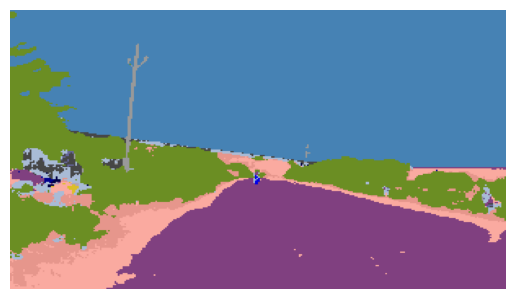

Saved segmented image to pred\frame1347.jpg
Processing test\frame1348.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


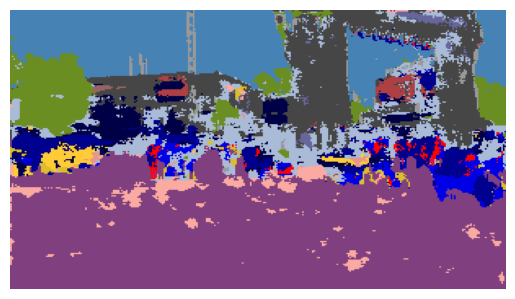

Saved segmented image to pred\frame1348.jpg
Processing test\frame1356.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


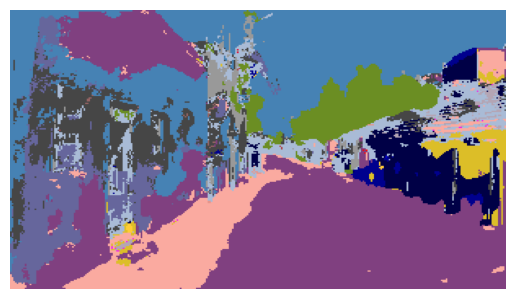

Saved segmented image to pred\frame1356.jpg
Processing test\frame1384.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


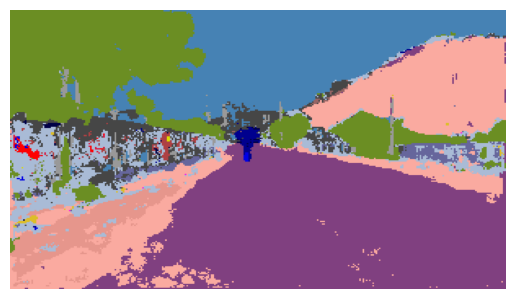

Saved segmented image to pred\frame1384.jpg
Processing test\frame1393.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


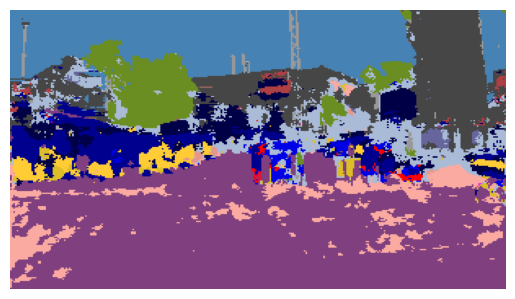

Saved segmented image to pred\frame1393.jpg
Processing test\frame1428.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


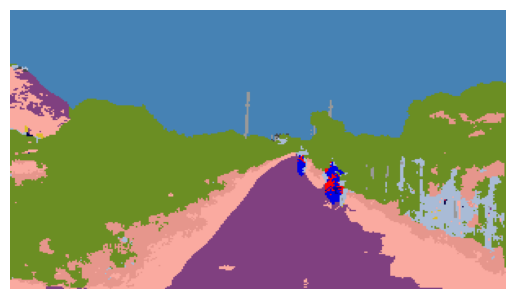

Saved segmented image to pred\frame1428.jpg
Processing test\frame1518.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


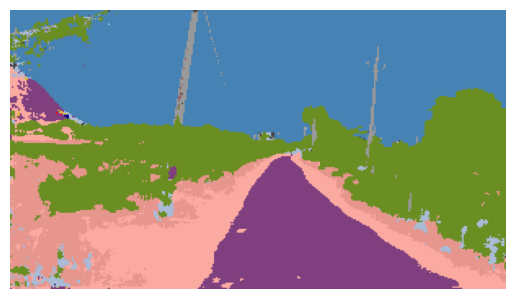

Saved segmented image to pred\frame1518.jpg
Processing test\frame1527.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


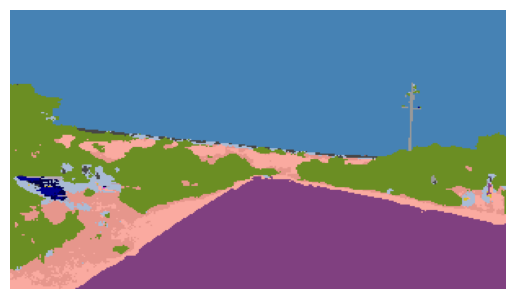

Saved segmented image to pred\frame1527.jpg
Processing test\frame1534.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


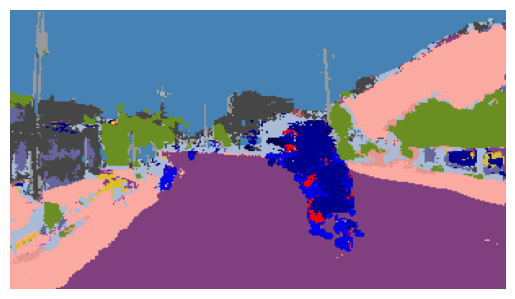

Saved segmented image to pred\frame1534.jpg
Processing test\frame1565.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


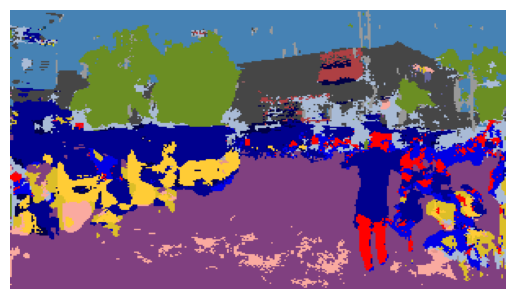

Saved segmented image to pred\frame1565.jpg
Processing test\frame1591.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


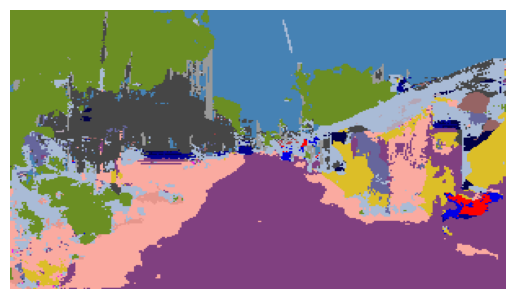

Saved segmented image to pred\frame1591.jpg
Processing test\frame1630.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


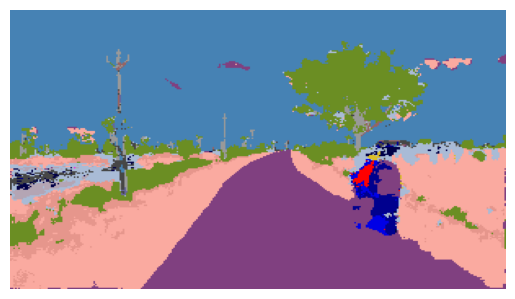

Saved segmented image to pred\frame1630.jpg
Processing test\frame1647.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


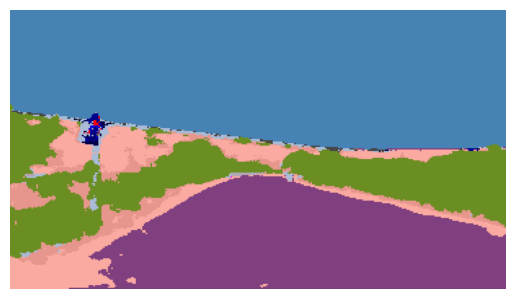

Saved segmented image to pred\frame1647.jpg
Processing test\frame1654.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


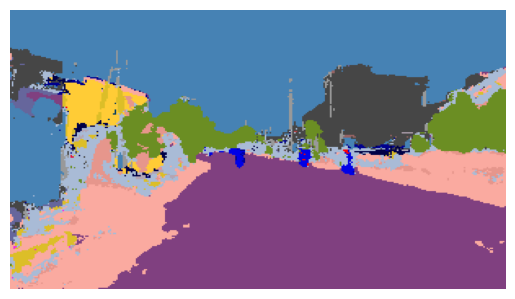

Saved segmented image to pred\frame1654.jpg
Processing test\frame1793.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


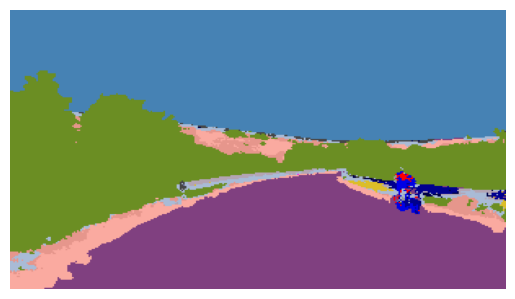

Saved segmented image to pred\frame1793.jpg
Processing test\frame1833.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


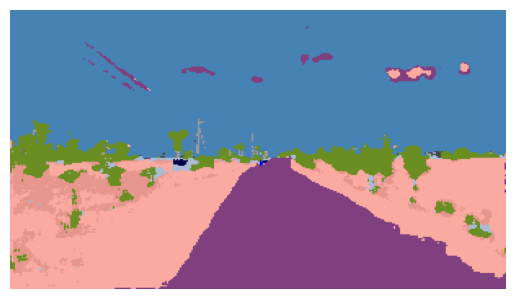

Saved segmented image to pred\frame1833.jpg
Processing test\frame1848.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


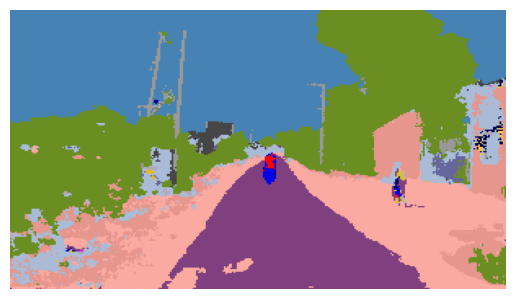

Saved segmented image to pred\frame1848.jpg
Processing test\frame1866.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


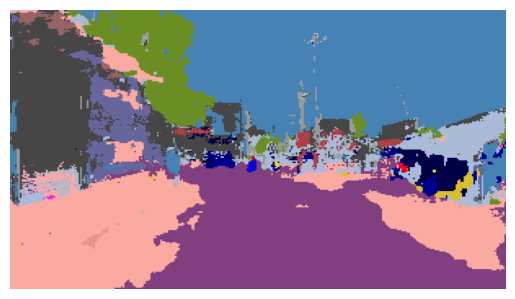

Saved segmented image to pred\frame1866.jpg
Processing test\frame1878.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


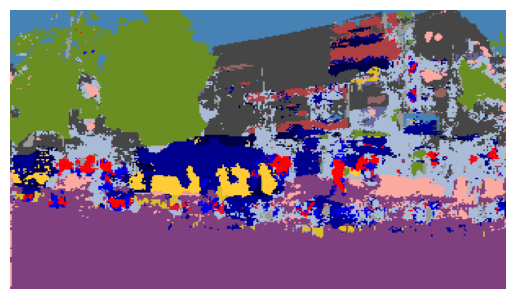

Saved segmented image to pred\frame1878.jpg
Processing test\frame1898.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


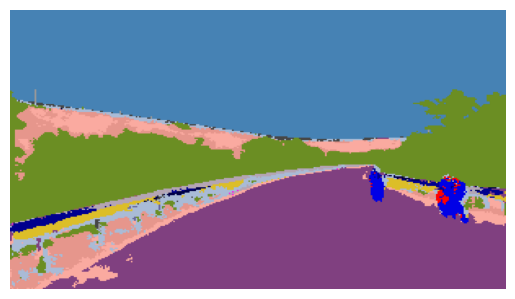

Saved segmented image to pred\frame1898.jpg
Processing test\frame1900.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


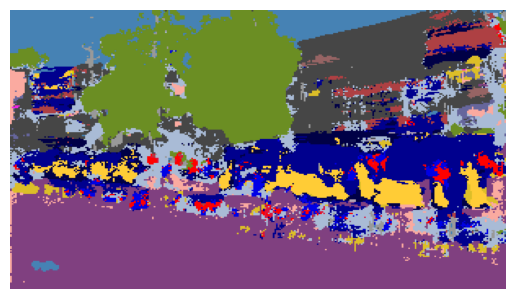

Saved segmented image to pred\frame1900.jpg
Processing test\frame1918.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


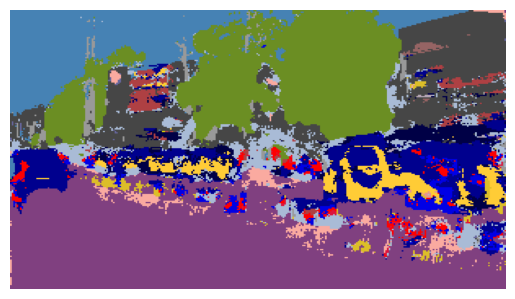

Saved segmented image to pred\frame1918.jpg
Processing test\frame2014.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


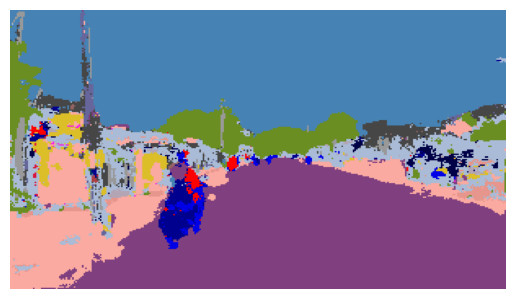

Saved segmented image to pred\frame2014.jpg
Processing test\frame2043.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


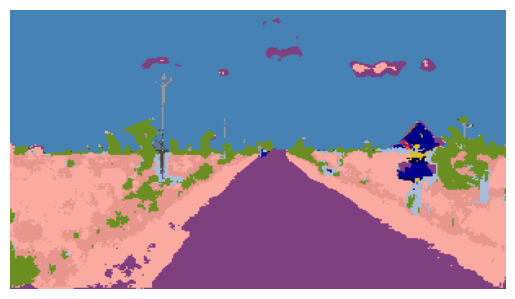

Saved segmented image to pred\frame2043.jpg
Processing test\frame2046.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


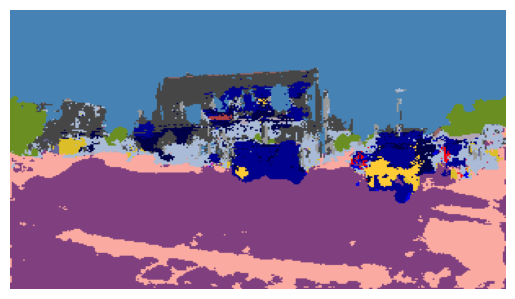

Saved segmented image to pred\frame2046.jpg
Processing test\frame2058.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


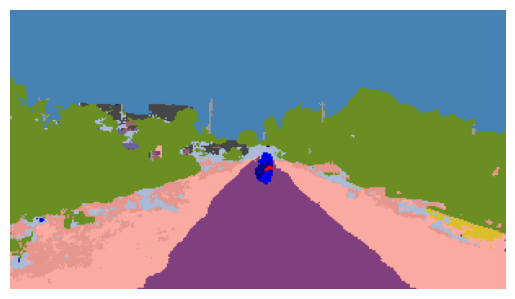

Saved segmented image to pred\frame2058.jpg
Processing test\frame2063.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


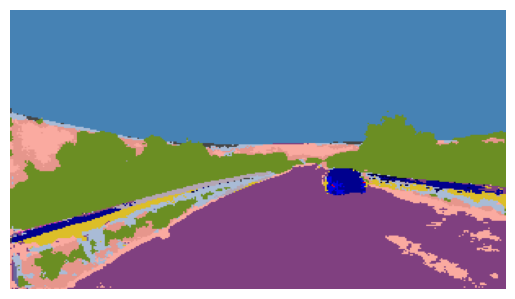

Saved segmented image to pred\frame2063.jpg
Processing test\frame2132.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


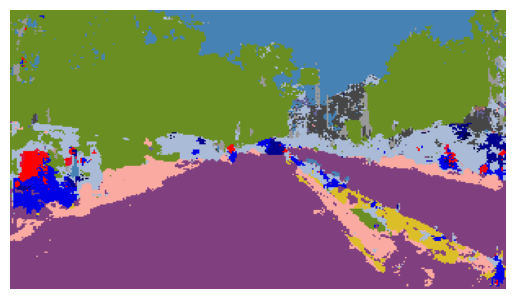

Saved segmented image to pred\frame2132.jpg
Processing test\frame2193.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


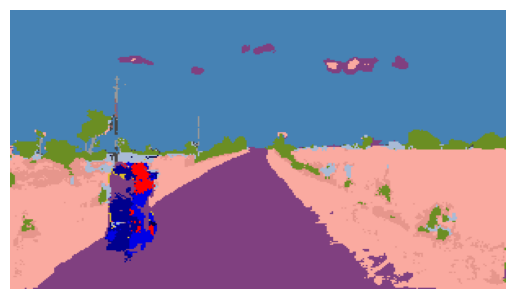

Saved segmented image to pred\frame2193.jpg
Processing test\frame2293.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


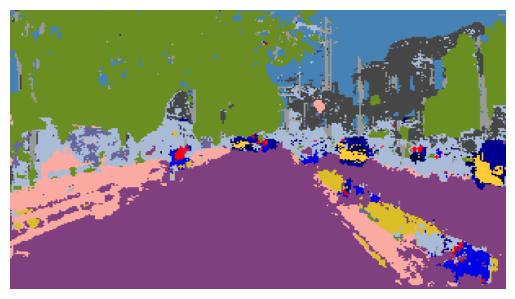

Saved segmented image to pred\frame2293.jpg
Processing test\frame2314.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


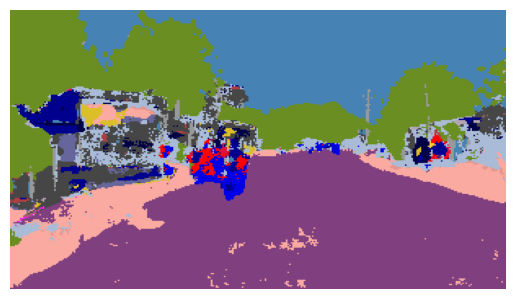

Saved segmented image to pred\frame2314.jpg
Processing test\frame2423.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


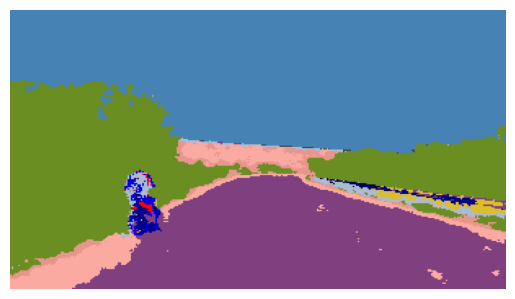

Saved segmented image to pred\frame2423.jpg
Processing test\frame2528.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


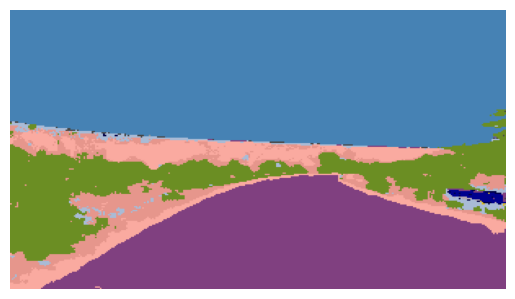

Saved segmented image to pred\frame2528.jpg
Processing test\frame2584.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


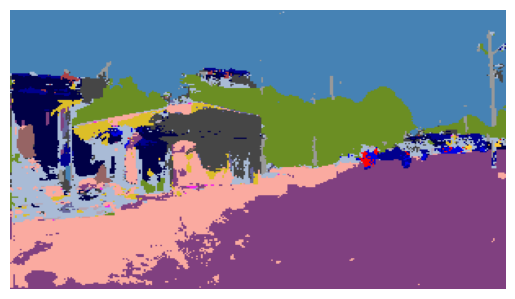

Saved segmented image to pred\frame2584.jpg
Processing test\frame2598.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


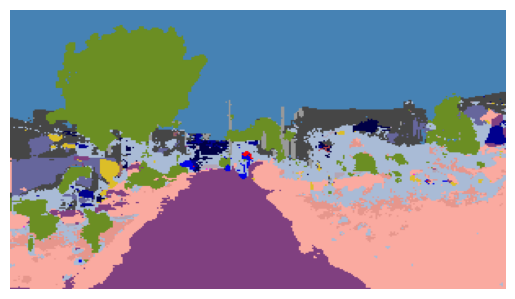

Saved segmented image to pred\frame2598.jpg
Processing test\frame2796.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


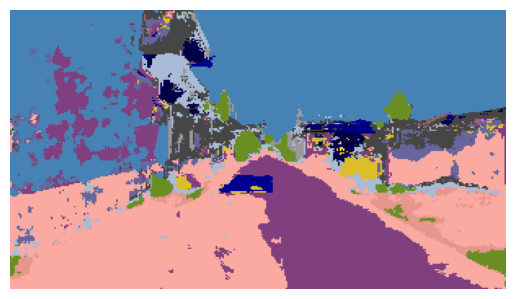

Saved segmented image to pred\frame2796.jpg
Processing test\frame2824.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


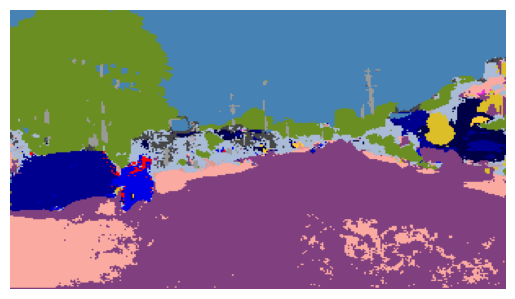

Saved segmented image to pred\frame2824.jpg
Processing test\frame2838.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


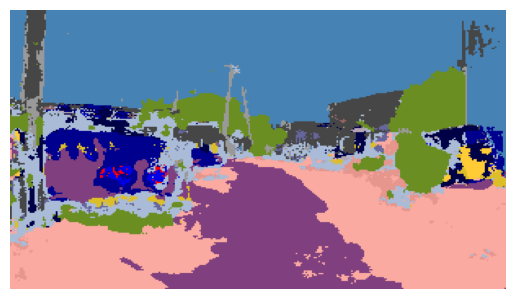

Saved segmented image to pred\frame2838.jpg
Processing test\frame2944.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


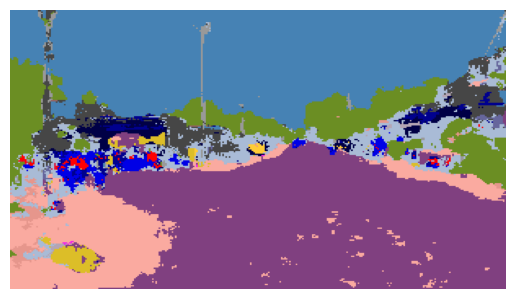

Saved segmented image to pred\frame2944.jpg
Processing test\frame2949.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


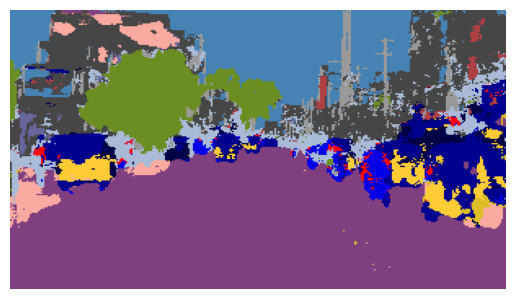

Saved segmented image to pred\frame2949.jpg
Processing test\frame2976.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


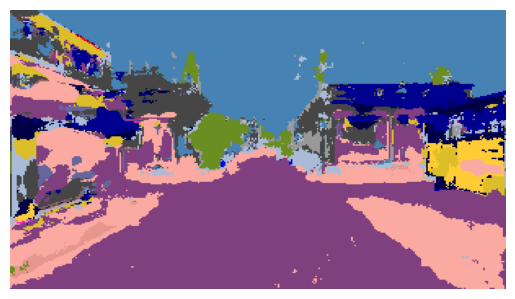

Saved segmented image to pred\frame2976.jpg
Processing test\frame2993.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


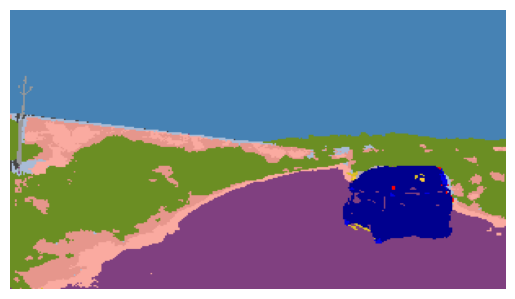

Saved segmented image to pred\frame2993.jpg
Processing test\frame3048.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


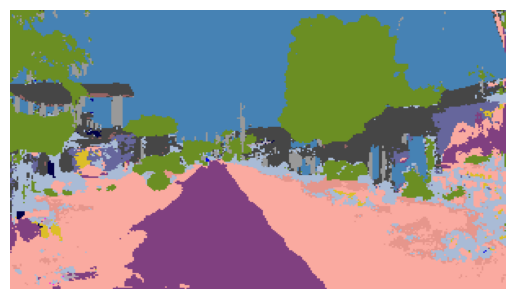

Saved segmented image to pred\frame3048.jpg
Processing test\frame3094.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


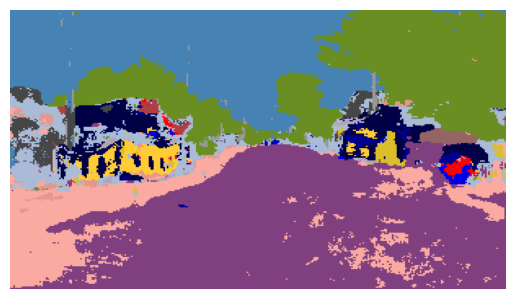

Saved segmented image to pred\frame3094.jpg
Processing test\frame3134.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


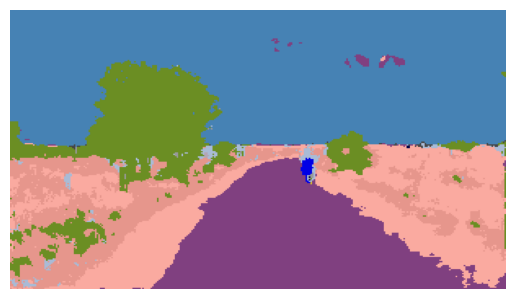

Saved segmented image to pred\frame3134.jpg
Processing test\frame3263.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


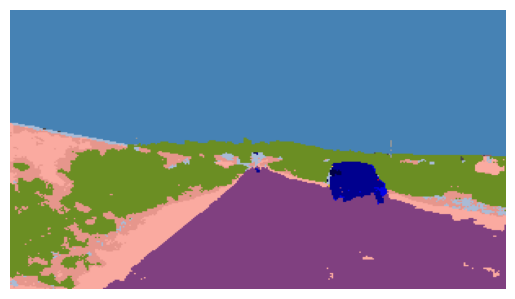

Saved segmented image to pred\frame3263.jpg
Processing test\frame3276.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


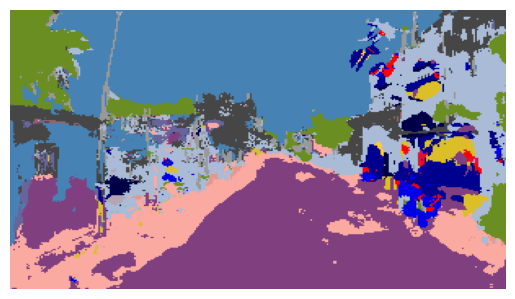

Saved segmented image to pred\frame3276.jpg
Processing test\frame3334.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


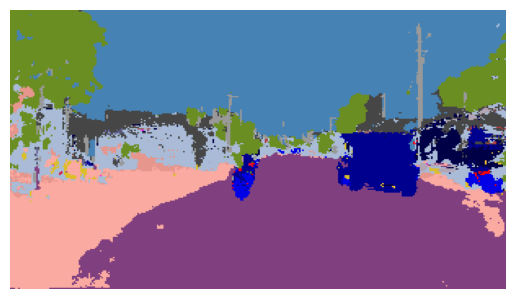

Saved segmented image to pred\frame3334.jpg
Processing test\frame3348.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


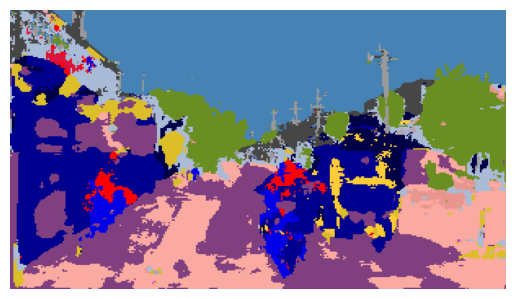

Saved segmented image to pred\frame3348.jpg
Processing test\frame3486.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


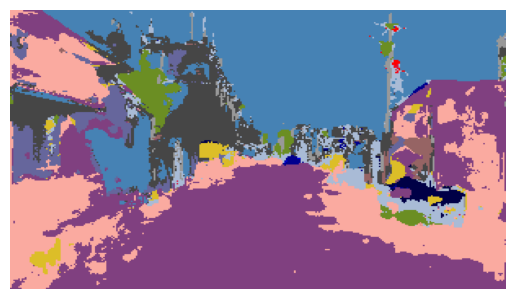

Saved segmented image to pred\frame3486.jpg
Processing test\frame3532.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


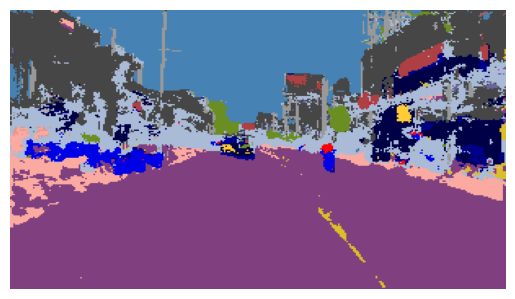

Saved segmented image to pred\frame3532.jpg
Processing test\frame3592.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


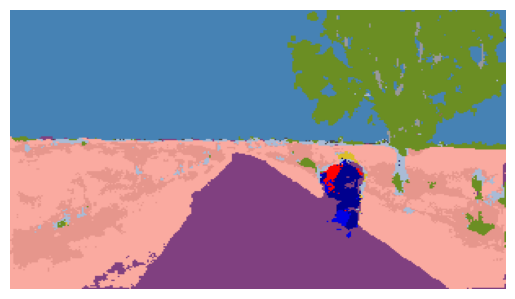

Saved segmented image to pred\frame3592.jpg
Processing test\frame3618.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


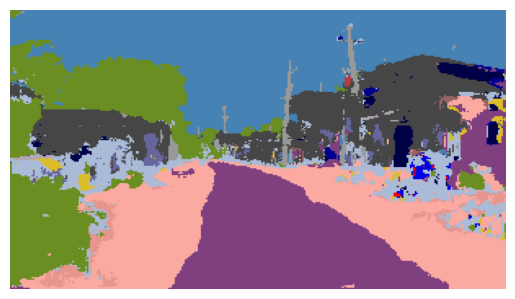

Saved segmented image to pred\frame3618.jpg
Processing test\frame3691.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


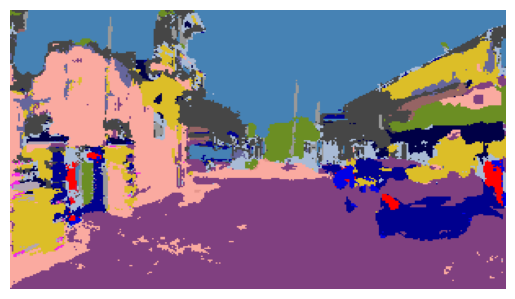

Saved segmented image to pred\frame3691.jpg
Processing test\frame3724.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


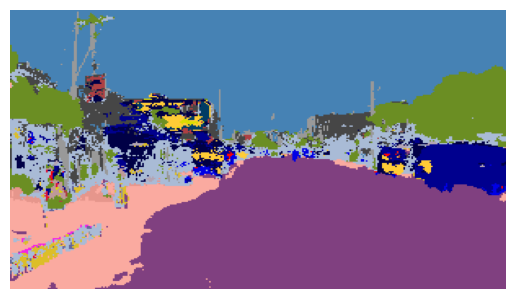

Saved segmented image to pred\frame3724.jpg
Processing test\frame3828.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


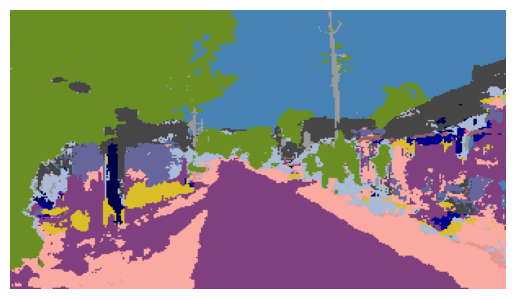

Saved segmented image to pred\frame3828.jpg
Processing test\frame3862.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


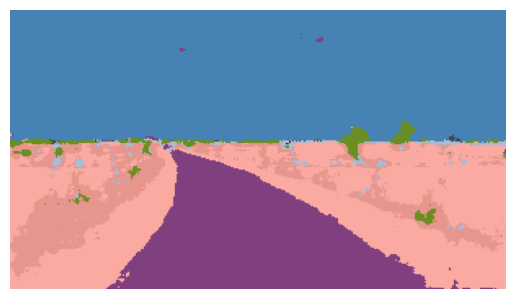

Saved segmented image to pred\frame3862.jpg
Processing test\frame3966.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


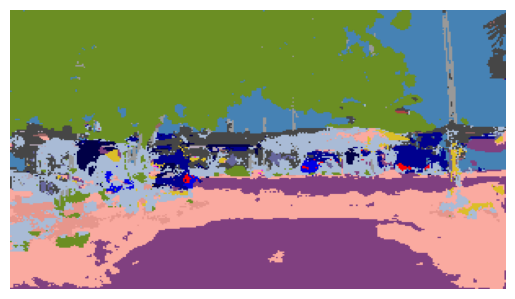

Saved segmented image to pred\frame3966.jpg
Processing test\frame3967.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


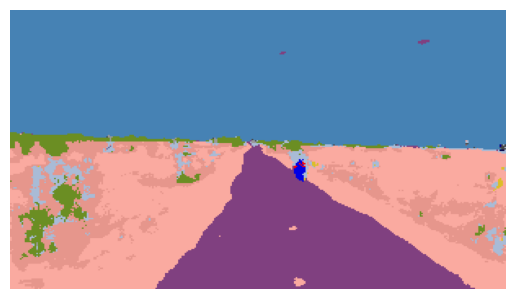

Saved segmented image to pred\frame3967.jpg
Processing test\frame4043.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


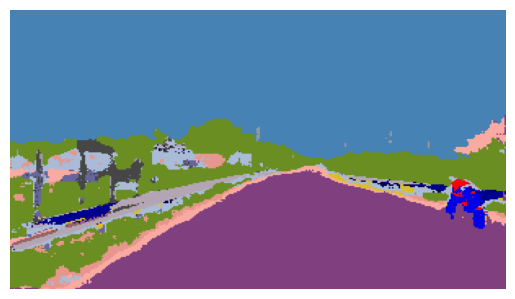

Saved segmented image to pred\frame4043.jpg
Processing test\frame4266.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


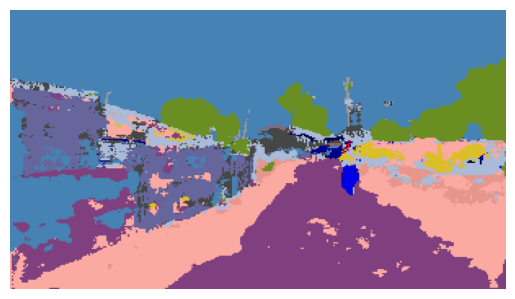

Saved segmented image to pred\frame4266.jpg
Processing test\frame4283.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


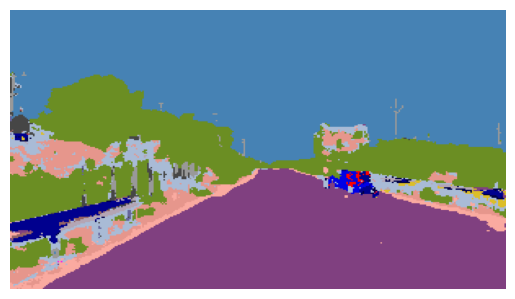

Saved segmented image to pred\frame4283.jpg
Processing test\frame4428.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


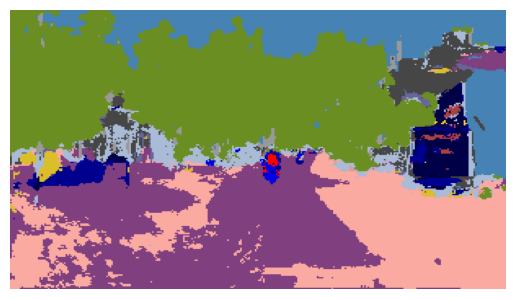

Saved segmented image to pred\frame4428.jpg
Processing test\frame4566.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


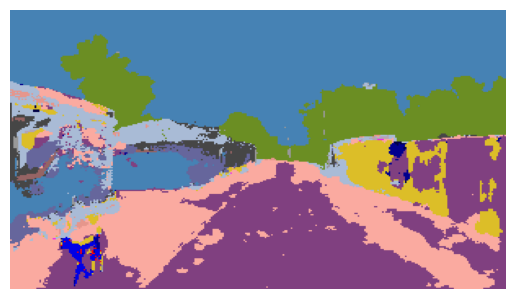

Saved segmented image to pred\frame4566.jpg
Processing test\frame4763.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


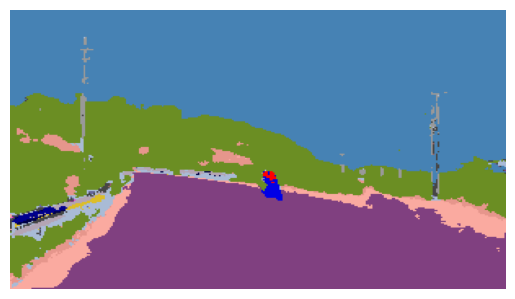

Saved segmented image to pred\frame4763.jpg
Processing test\frame4986.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


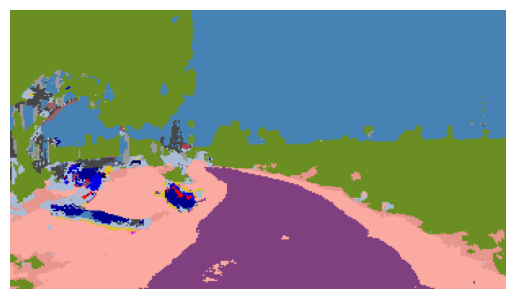

Saved segmented image to pred\frame4986.jpg
Processing test\frame5153.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


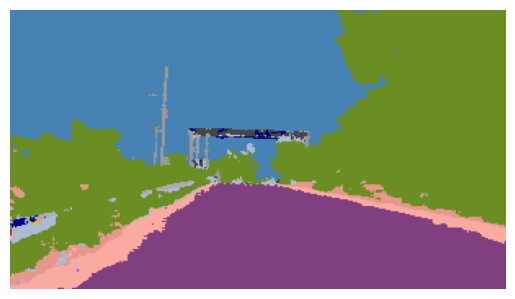

Saved segmented image to pred\frame5153.jpg
Processing test\frame5196.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


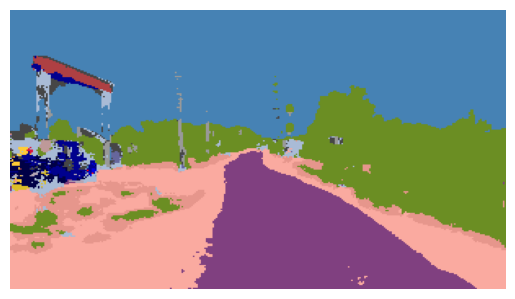

Saved segmented image to pred\frame5196.jpg
Processing test\frame5393.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


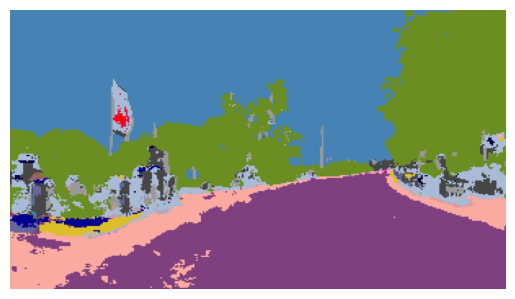

Saved segmented image to pred\frame5393.jpg
Processing test\frame5406.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


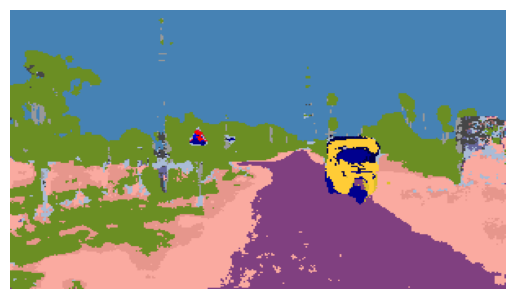

Saved segmented image to pred\frame5406.jpg
Processing test\frame5573.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


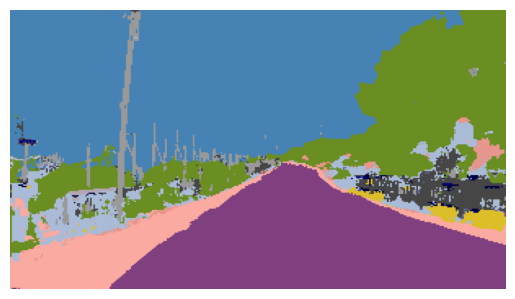

Saved segmented image to pred\frame5573.jpg
Processing test\frame5586.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


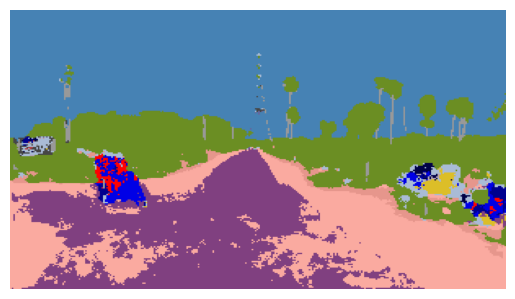

Saved segmented image to pred\frame5586.jpg
Processing test\frame5783.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


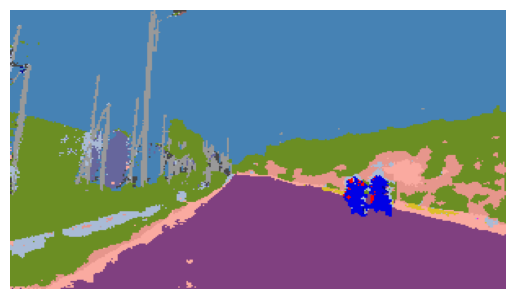

Saved segmented image to pred\frame5783.jpg
Processing test\frame6009.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


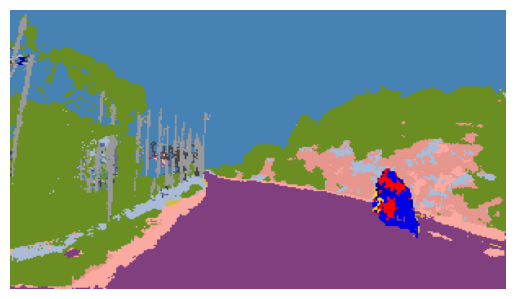

Saved segmented image to pred\frame6009.jpg
Processing test\frame6216.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


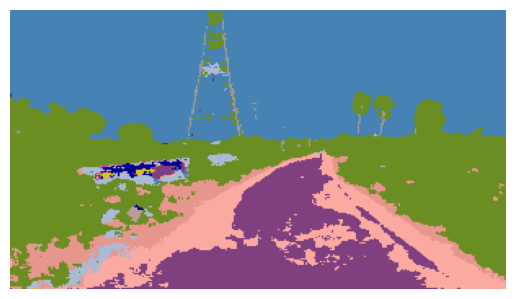

Saved segmented image to pred\frame6216.jpg
Processing test\frame6396.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


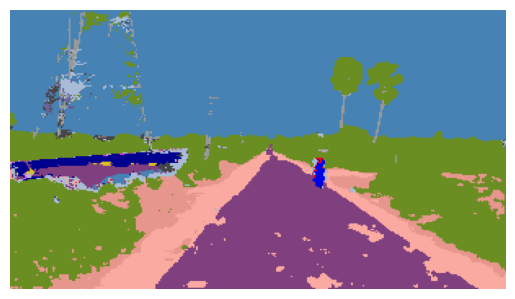

Saved segmented image to pred\frame6396.jpg
Processing test\frame6473.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


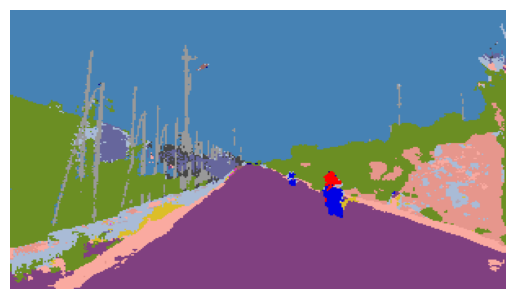

Saved segmented image to pred\frame6473.jpg
Processing test\frame6893.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


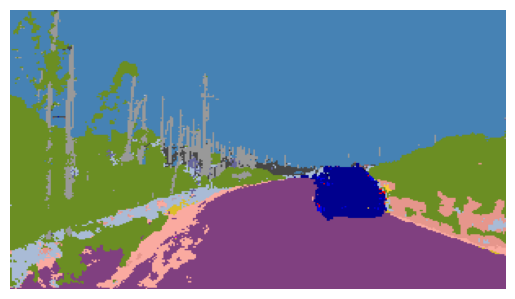

Saved segmented image to pred\frame6893.jpg
Processing test\frame6966.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


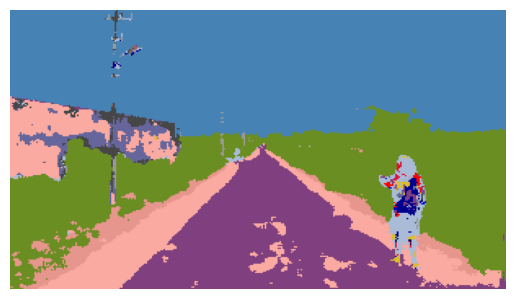

Saved segmented image to pred\frame6966.jpg
Processing test\frame7283.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


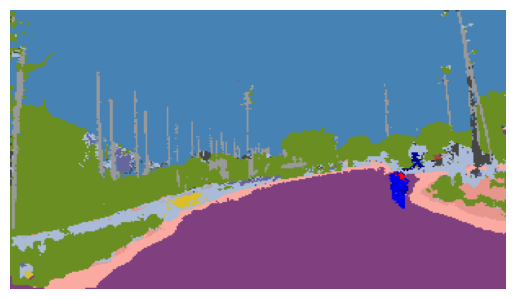

Saved segmented image to pred\frame7283.jpg
Processing test\frame7433.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


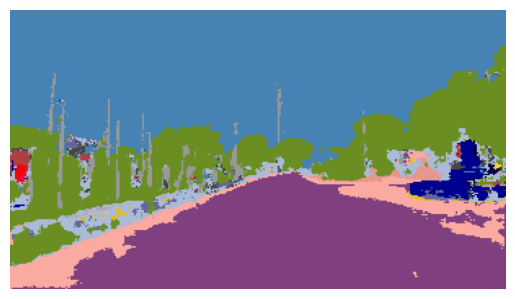

Saved segmented image to pred\frame7433.jpg
Processing test\frame7446.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


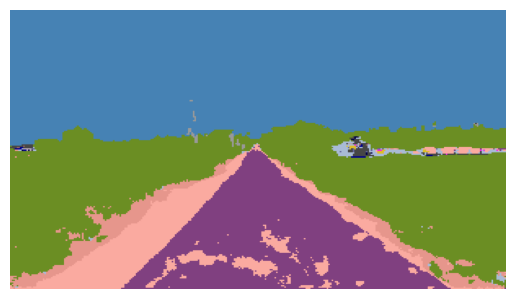

Saved segmented image to pred\frame7446.jpg
Processing test\frame8826.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


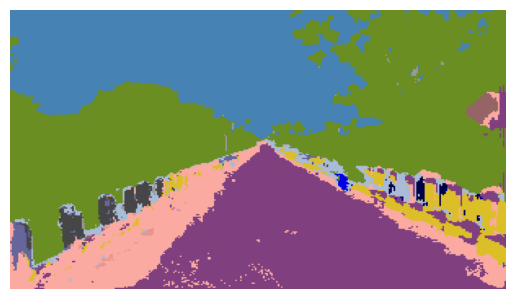

Saved segmented image to pred\frame8826.jpg
Processing test\frame9426.jpg...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


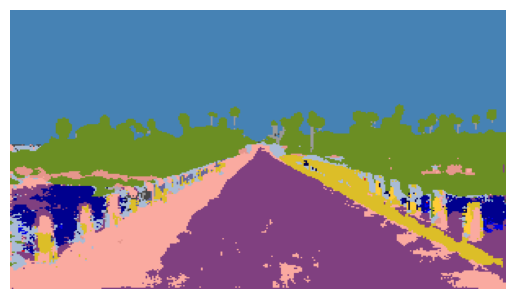

Saved segmented image to pred\frame9426.jpg


In [6]:
import os

def predict_and_save_images(model, test_folder, output_folder, class_colors):
    """Predict segmentation for all images in the test folder and save the outputs."""
    
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # Iterate over each file in the test folder
    for file_name in os.listdir(test_folder):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            input_path = os.path.join(test_folder, file_name)
            print(f"Processing {input_path}...")

            # Predict the segmentation
            segmented_image = predict(
                model=model,
                inp=input_path,
                colors=class_colors,
            )
            
            # Save the segmented image to the output folder
            output_path = os.path.join(output_folder, file_name)
            cv2.imwrite(output_path, segmented_image)
            print(f"Saved segmented image to {output_path}")

# Assuming you have a trained model and the class colors defined
# Model should be pre-loaded here as 'model'
# Define your class colors (replace with actual colors)
# Specify your test and output folder paths
test_folder = 'test'
output_folder = 'pred'

# Call the function to predict and save images
predict_and_save_images(model, test_folder, output_folder, class_colors)